In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px
import scipy.stats as st
import numpy as py



In [3]:
data_df = pd.read_csv('Resources/Crime_Data_from_2020_to_Present.csv')

main_df = data_df[['DR_NO', 'DATE OCC', 
                   'TIME OCC', 'Vict Age', 
                   'Vict Sex','Vict Descent',
                  'LAT', 'LON']]
main_df.count()

DR_NO           757141
DATE OCC        757141
TIME OCC        757141
Vict Age        757141
Vict Sex        658230
Vict Descent    658224
LAT             757141
LON             757141
dtype: int64

In [4]:
# disclaimer for dropping missing age data
cleaning_df = main_df.set_index('DR_NO')
cleaning_df = cleaning_df.loc[(cleaning_df['Vict Age'] > 0) &
                              (cleaning_df['Vict Sex'] != "H") &
                              (cleaning_df['Vict Descent'] != "-")]
cleaning_df = cleaning_df.reset_index()
cleaning_df = cleaning_df.dropna(how='any')

In [5]:
final_df = cleaning_df.rename(columns={'DR_NO': 'File Number',
                                      'DATE OCC': 'Date Occurred',
                                      'TIME OCC': 'Time Occurred',
                                      'LAT': 'Latitude',
                                      'LON': 'Longitude'})
final_df = final_df.set_index('File Number')
final_df.head()

,Date Occurred,Time Occurred,Vict Age,Vict Sex,Vict Descent,Latitude,Longitude
File Number,,,,,,,
10304468,01/08/2020 12:00:00 AM,2230,36,F,B,34.0141,-118.2978
190101086,01/01/2020 12:00:00 AM,330,25,M,H,34.0459,-118.2545
191501505,01/01/2020 12:00:00 AM,1730,76,F,W,34.1685,-118.4019
191921269,01/01/2020 12:00:00 AM,415,31,X,X,34.2198,-118.4468
200100501,01/01/2020 12:00:00 AM,30,25,F,H,34.0452,-118.2534


In [6]:
#add a new column that allows us to separate data by year

final_df['Date Occurred'] = pd.to_datetime(final_df['Date Occurred'], format='%m/%d/%Y %I:%M:%S %p')
final_df['Year'] = final_df['Date Occurred'].dt.year

final_df.head()

,Date Occurred,Time Occurred,Vict Age,Vict Sex,Vict Descent,Latitude,Longitude,Year
File Number,,,,,,,,
10304468,2020-01-08,2230,36,F,B,34.0141,-118.2978,2020
190101086,2020-01-01,330,25,M,H,34.0459,-118.2545,2020
191501505,2020-01-01,1730,76,F,W,34.1685,-118.4019,2020
191921269,2020-01-01,415,31,X,X,34.2198,-118.4468,2020
200100501,2020-01-01,30,25,F,H,34.0452,-118.2534,2020


In [7]:
#Group by racial category and year

racial_descent_mapping = {
    'A': 'Asian',
    'C': 'Asian',
    'D':'Asian',
    'F': 'Asian',
    'J': 'Asian',
    'K': 'Asian',
    'L': 'Asian',
    'V': 'Asian',
    'G': 'Hawaiin and Pacific Islander',
    'P': 'Hawaiin and Pacific Islander',
    'S': 'Hawaiin and Pacific Islander',
    'U': 'Hawaiin and Pacific Islander',
    'B': 'Black',
    'H': 'Hispanic',
    'O': 'Other and Unknown',
    'X': 'Other and Unknown',
    'W': 'White',
    'Z': 'Asian Indian',
    'I': 'American Indian / Alaskan Native'}

final_df['broad_racial_descent'] = final_df['Vict Descent'].map(racial_descent_mapping).fillna(final_df['Vict Descent'])

final_df.head

<bound method NDFrame.head of             Date Occurred  Time Occurred  Vict Age Vict Sex Vict Descent  \
File Number                                                                
10304468       2020-01-08           2230        36        F            B   
190101086      2020-01-01            330        25        M            H   
191501505      2020-01-01           1730        76        F            W   
191921269      2020-01-01            415        31        X            X   
200100501      2020-01-01             30        25        F            H   
...                   ...            ...       ...      ...          ...   
231604807      2023-01-26           1800        23        M            H   
231606525      2023-03-22           1000        25        F            H   
231210064      2023-04-12           1630        29        M            B   
230115220      2023-07-01              1        24        F            H   
230906458      2023-03-05            900        53        

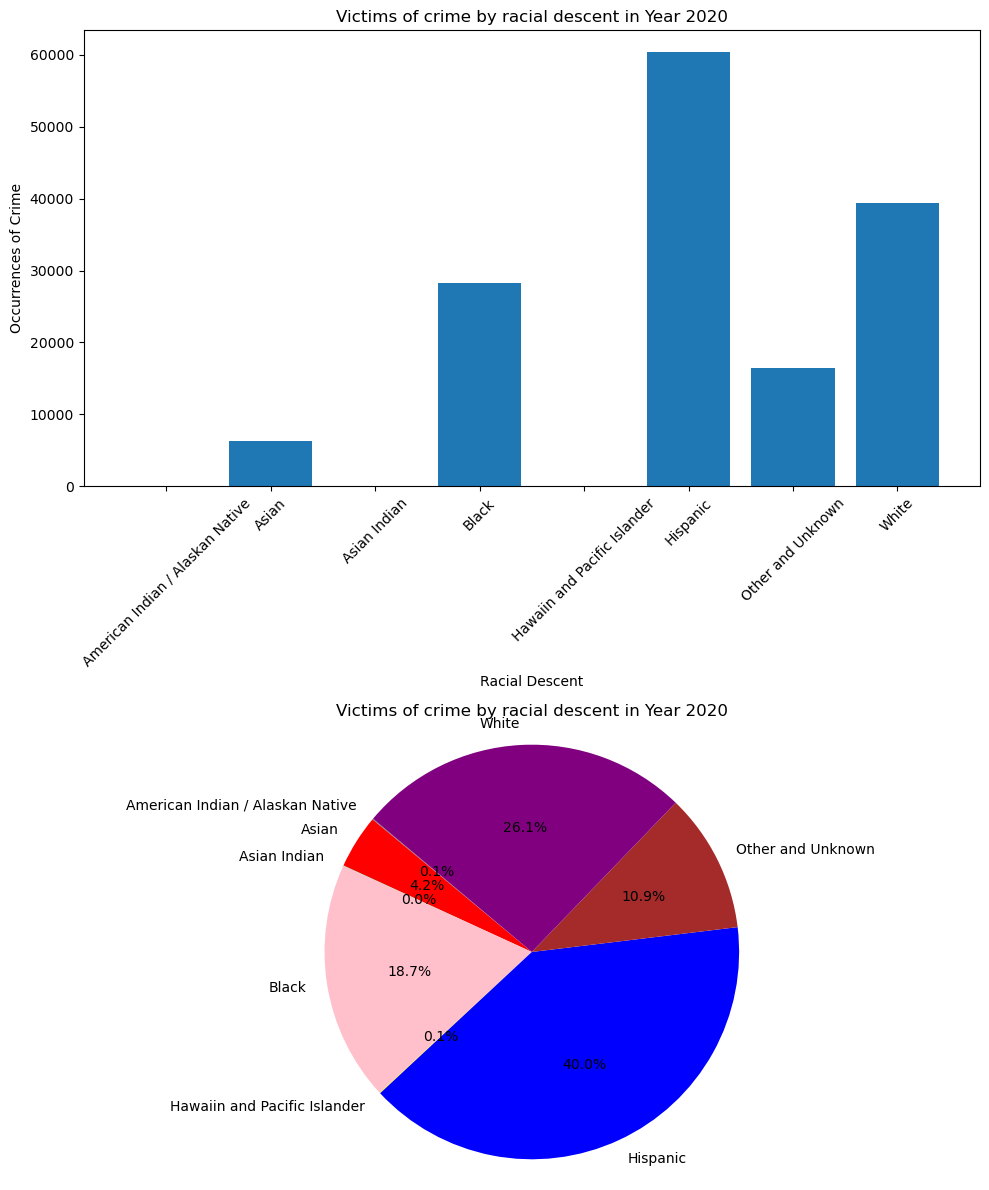

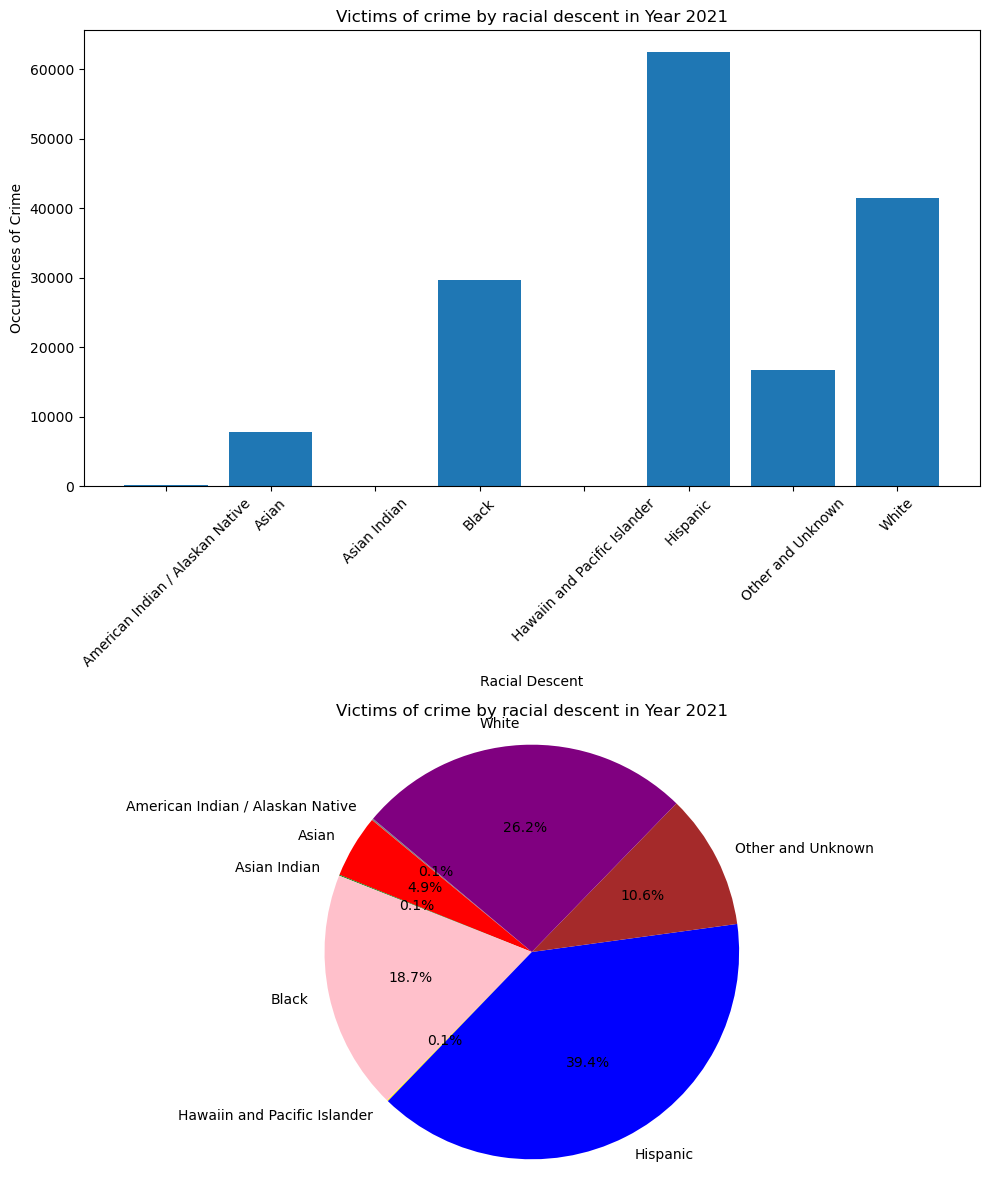

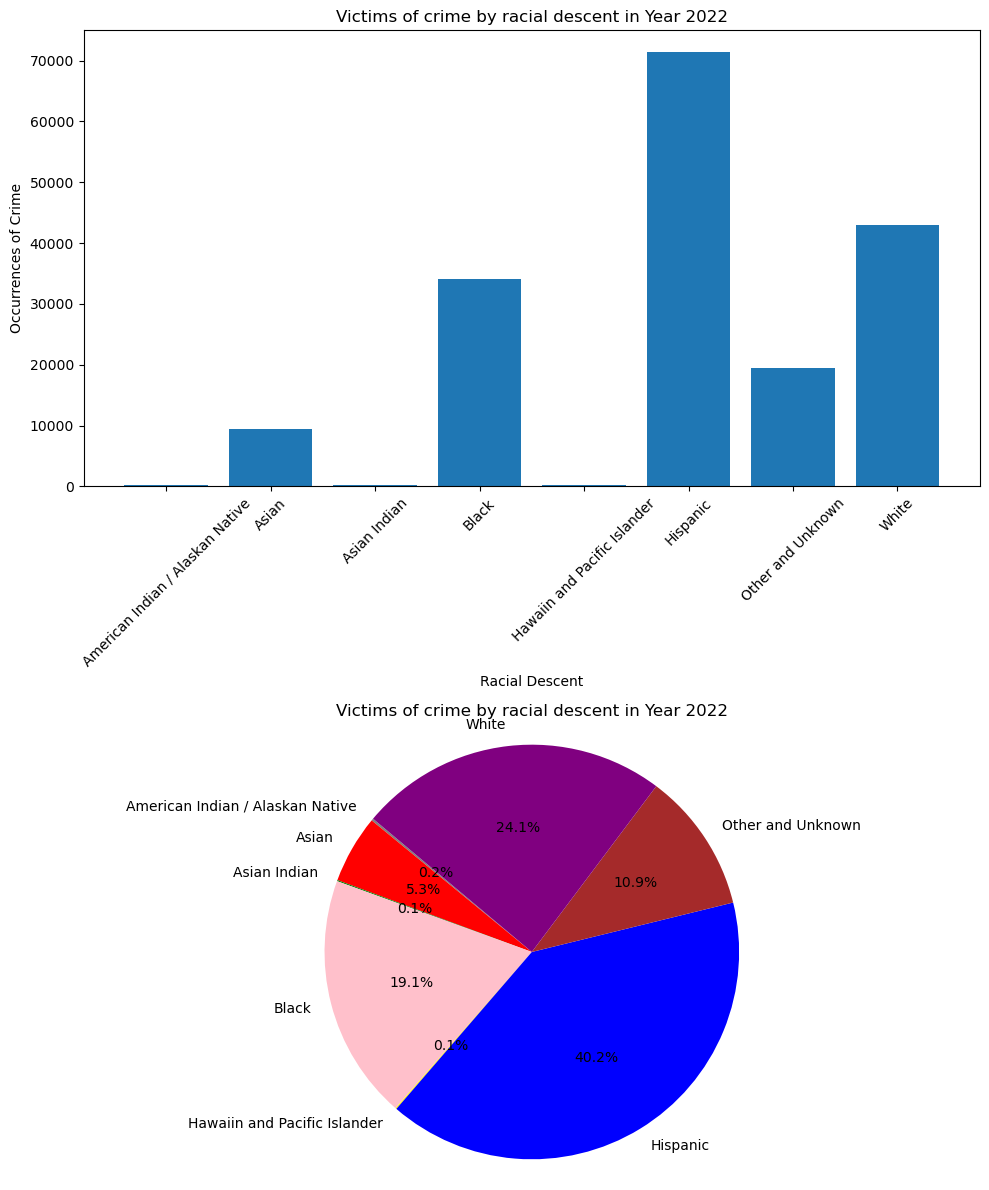

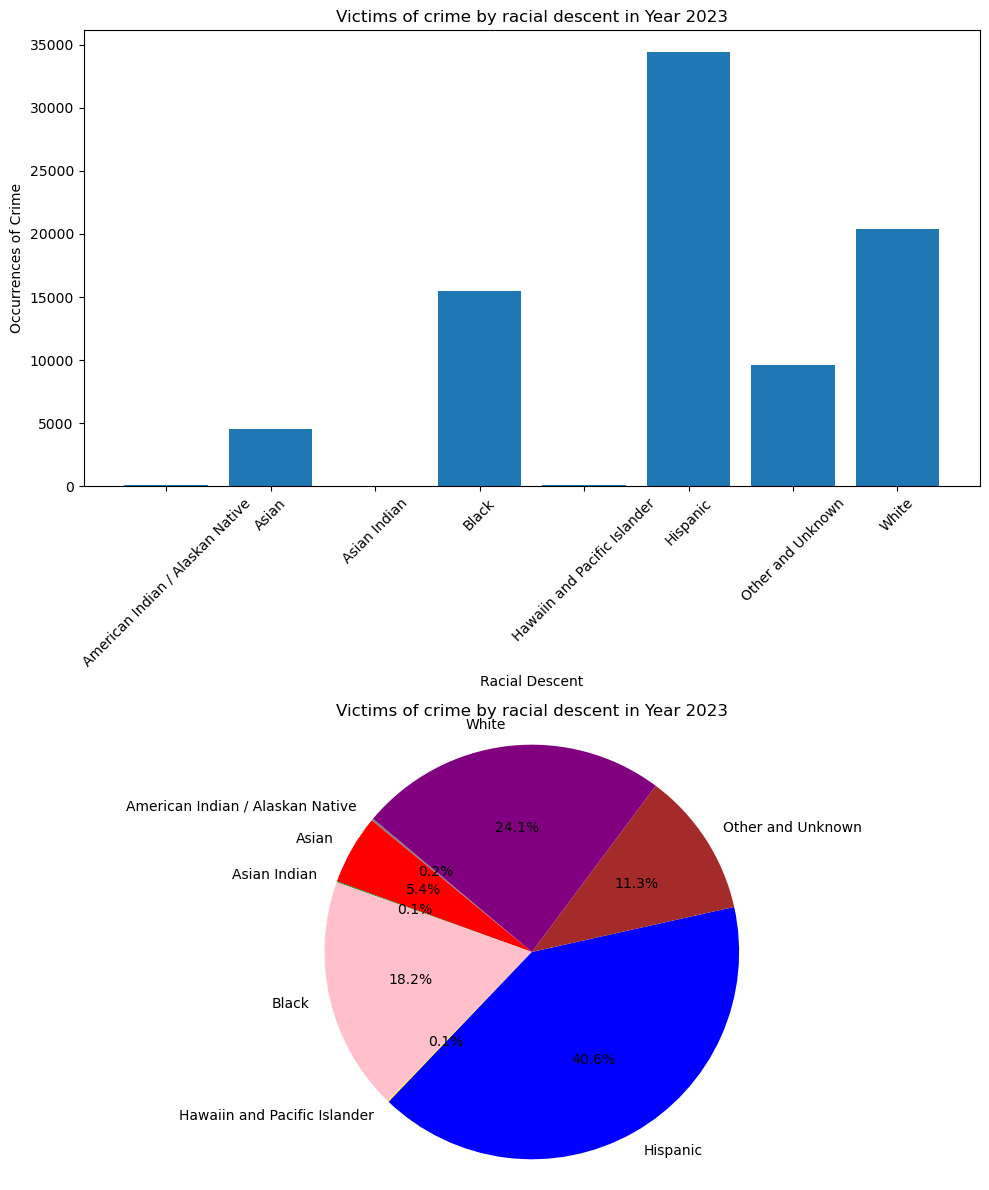

In [10]:
# Group the data by 'Year' and 'broad_racial_descent' and calculate the count for each group
grouped_data = final_df.groupby(['Year', 'broad_racial_descent']).size().reset_index(name='Count')

# Create a set of unique years
unique_years = set(grouped_data['Year'])

# Create bar charts and pie charts for each year
for year in unique_years:
    plt.figure(figsize=(10, 12))

    # Filter data for the specific year
    data_year = grouped_data[grouped_data['Year'] == year]

    # Bar Chart
    plt.subplot(2, 1, 1)
    plt.bar(data_year['broad_racial_descent'], data_year['Count'])
    plt.xlabel('Racial Descent')
    plt.ylabel('Occurrences of Crime')
    plt.title(f'Victims of crime by racial descent in Year {year}')
    plt.xticks(rotation=45)
    
    plt.savefig(f'racial_descent_bar_chart_year_{year}.png')

    # Pie Chart
    color_scheme = ['grey', 'red', 'green', 'pink', 'yellow', 'blue', 'brown', 'purple']
    plt.subplot(2, 1, 2)
    plt.pie(data_year['Count'], labels=data_year['broad_racial_descent'], autopct='%1.1f%%', startangle=140, colors = color_scheme)
    plt.title(f'Victims of crime by racial descent in Year {year}')
    plt.axis('equal')
    
    plt.savefig(f'racial_descent_pie_chart_year_{year}.png')

    plt.tight_layout()
    plt.show()

There is no significant variation in crimes against Asians among the years.


C:\Users\quazc\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))
